# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the data-employee-recruitment.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data.  
    1.2 *(1 point)* Check if the dataset is imbalanced. If necessary, apply SMOTE or another resampling technique to balance the classes.The technique should be applied only to the training set, while the test set should remain unchanged.  
    1.3 *(1 point)* Use GridSearchCV to find the best hyperparameters for both Decision Tree and Random Forest model. Report the best parameters.  
    1.4 *(1 point)* Train a Random Forest model and identify the most important features influencing job change predictions. Visualize the feature importance scores.  
    1.5 *(1 point)* Train a Decision Tree classifier and visualize the resulting tree structure. Explain any patterns or rules observed from the tree.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Which features in the dataset do you think are most important for predicting job changes? Did the feature importance analysis confirm your expectations?  
    2.2 *(1 point)* How did the performance of the Random Forest model compare to the Decision Tree model? Was this result expected?  
    2.3 *(1 point)* When visualizing the Decision Tree, were the splits and decisions intuitive? Did you notice any surprising decision rules?  
    2.4 *(1 point)* How could a company use a predictive model like this to improve its hiring and retention strategy? What are the potential benefits and risks?  
    2.5 *(1 point)* What part of this assignment did you find most difficult or insightful? If you had more time, what additional improvements would you make?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
# Load Pandas library and load the dataset
import pandas as pd
df = pd.read_csv("data-employee-recruitment.csv")

In [ ]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

## 1. Coding tasks

### 1.1 Basic Data Cleaning, Analysis and Visualization

#### 1.1.1 Basic Data Cleaning

In [ ]:
data = df.copy() # Create a copy of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


In [ ]:
# Checking null entries
data.isnull().sum()

,0
enrollee_id,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0
company_type,0


In [ ]:
data.head() # Check some data samples, observe that enrollee_id is not necessary
data.drop(columns=["enrollee_id"], inplace=True) # Drop the enrollee_id column
data.head() # Double check again

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


In [ ]:
# Describe the data set after one-hot encoding variable and dropping enrollee_id
data.describe()

,city_development_index,training_hours,target
count,2135.000000,2135.000000,2135.000000
mean,0.756329,65.296956,0.515222
std,0.145332,63.639919,0.499885
min,0.450000,-5.000000,0.000000
25%,0.624000,22.000000,0.000000
50%,0.743000,45.000000,1.000000
75%,0.910000,87.500000,1.000000
max,1.026000,336.000000,1.000000


#### 1.1.2 Exploratory Data Analysis and Visualization

In [ ]:
# Plot histogram or heatmap of this dataset
import matplotlib.pyplot as plt
import seaborn as sns

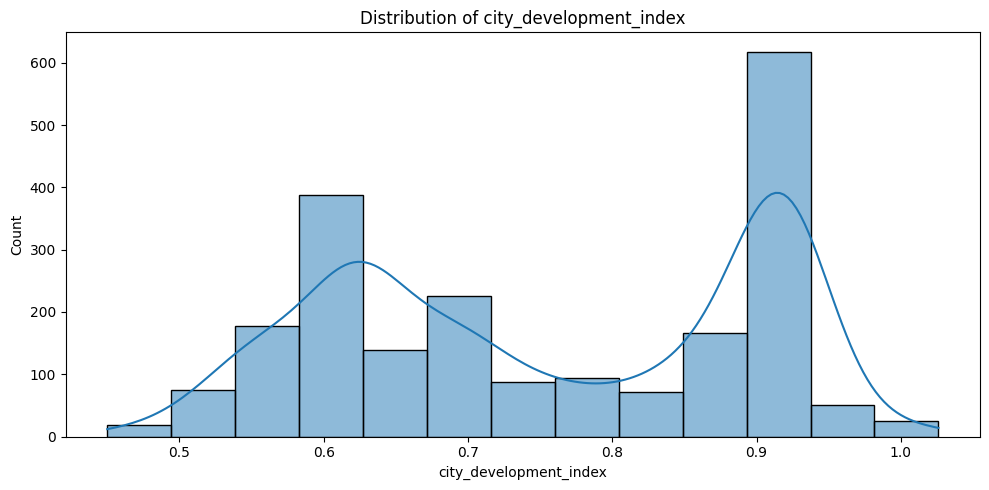

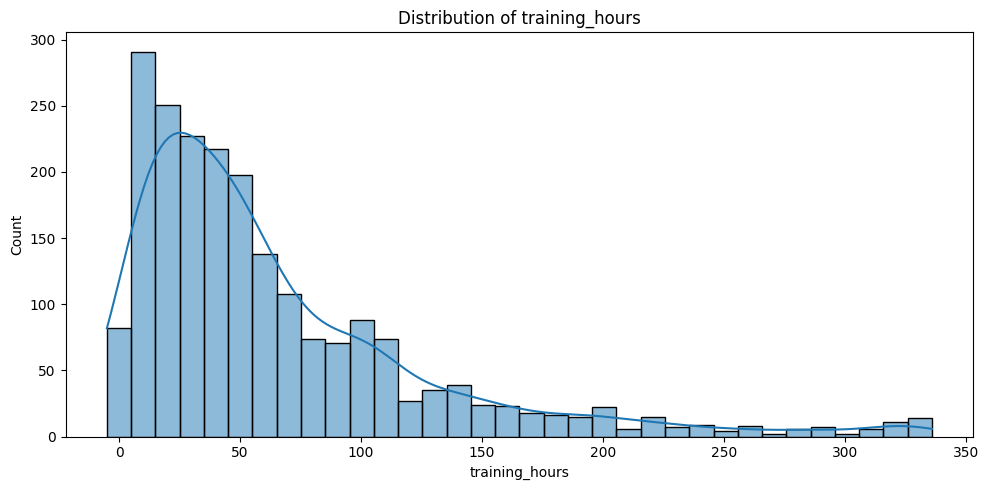

In [ ]:
# Histogram distribution of continuous data features
continuous_cols = ['city_development_index', 'training_hours']

for col in continuous_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

Comments on histogram distribution of continuous features (city_development_index and training_hours):
- The city_development_index likely represents the level of development of the city where each candidate currently lives or works, reflecting access to infrastructure, education, and economic opportunities. From the histogram, we can see that **a huge portion of candidates come from cities with a development index between 0.9 and 1.0**, meaning that **a large portion of the training participants are from highly developed urban areas**. This could imply that **`these candidates already have greater access to job opportunities and may therefore be more likely to explore job changes`**.
- **A notable portion of candidates also come from moderately developed cities (around 0.6)**, suggesting some diversity in background. **`However, very few candidates are from less-developed regions (below 0.5)`**, indicating that **`the dataset is skewed toward more developed cities`**. This concentration may **introduce bias in the model**, as **`the relationship between city development and job change tendency could be underrepresented for candidates from less-developed areas`**.

- For the training_hours feature, the distribution is right-skewed, with most candidates completing between 25 and 40 hours of training. As training hours increase beyond 100, the frequency steadily declines. This pattern suggests that most trainees spend a moderate amount of time in training, which may reflect either efficient learning or limited need for extensive upskilling. Conversely, candidates with very high training hours may represent individuals who are actively reskilling or preparing for a career shift, potentially indicating a higher likelihood of job change.
Thus, training_hours could serve as a proxy for career motivation or transition readiness, making it an important predictor for job change intent.

Overall, the dataset offers useful variation in training activity and city background but shows a bias toward candidates from moderately to highly developed cities. This bias means the model may overfit to urban patterns of job change behavior and might not generalize well to candidates from less-developed areas. In this context, city_development_index helps capture environmental job mobility factors, while training_hours reflects individual readiness or intent to seek new opportunities.

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


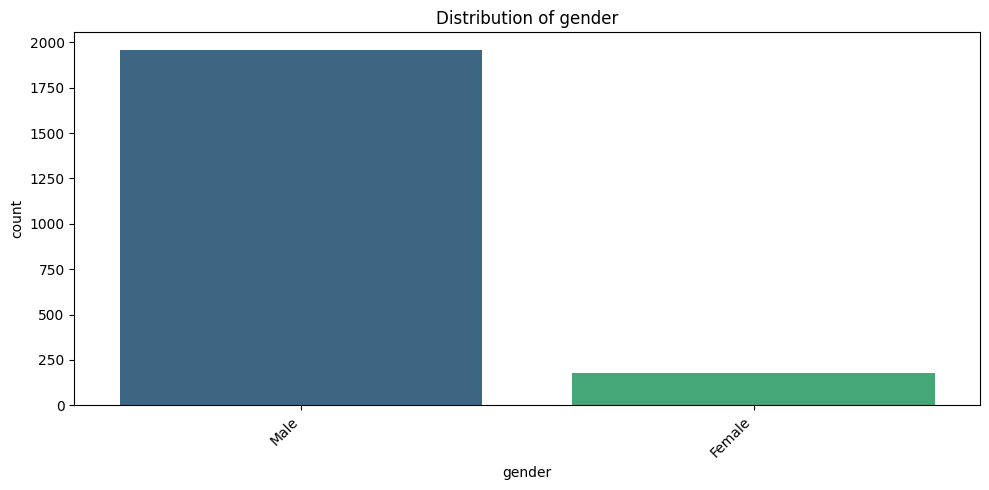

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


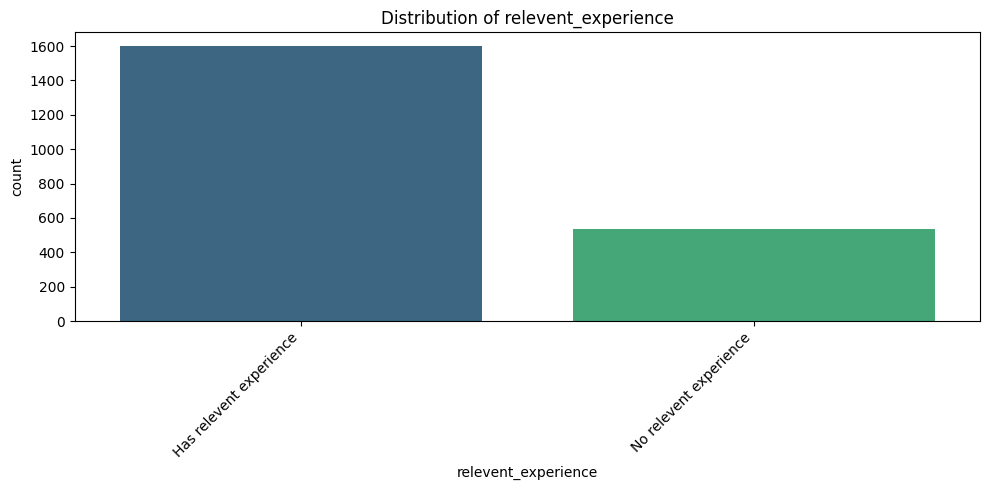

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


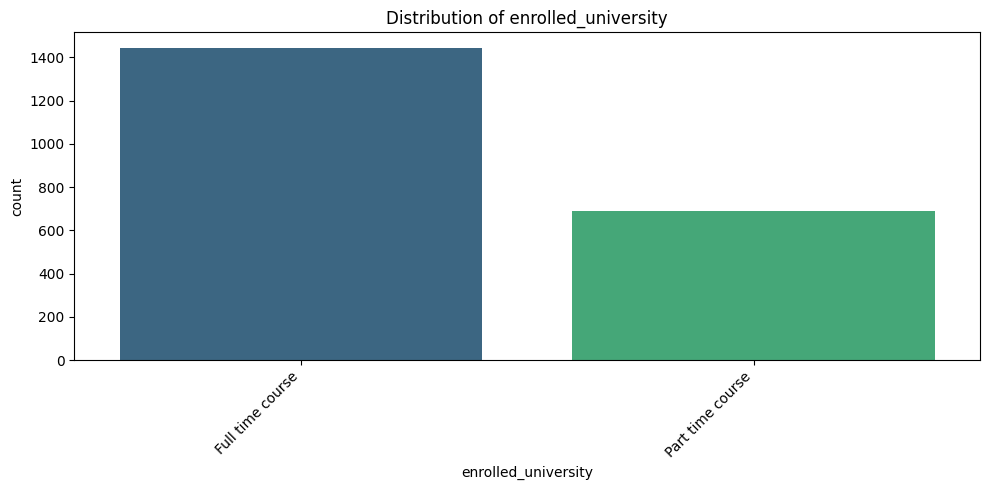

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


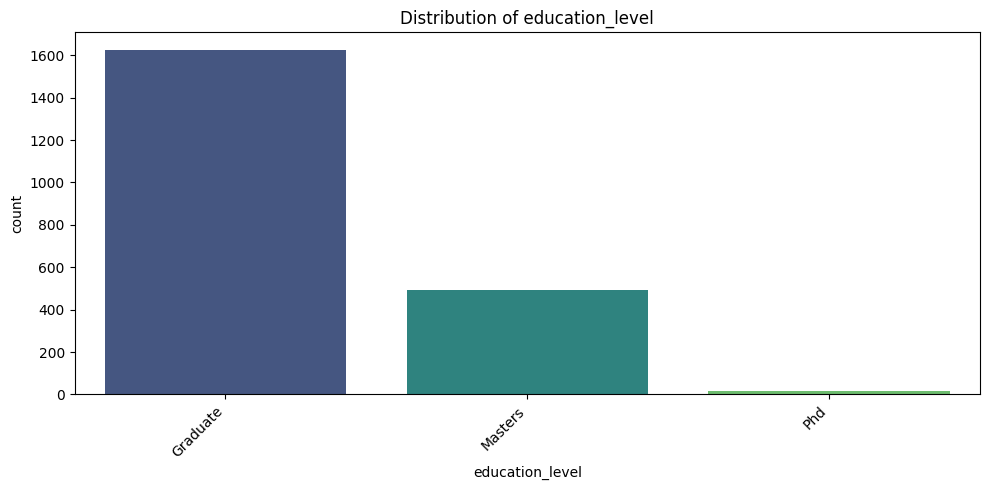

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


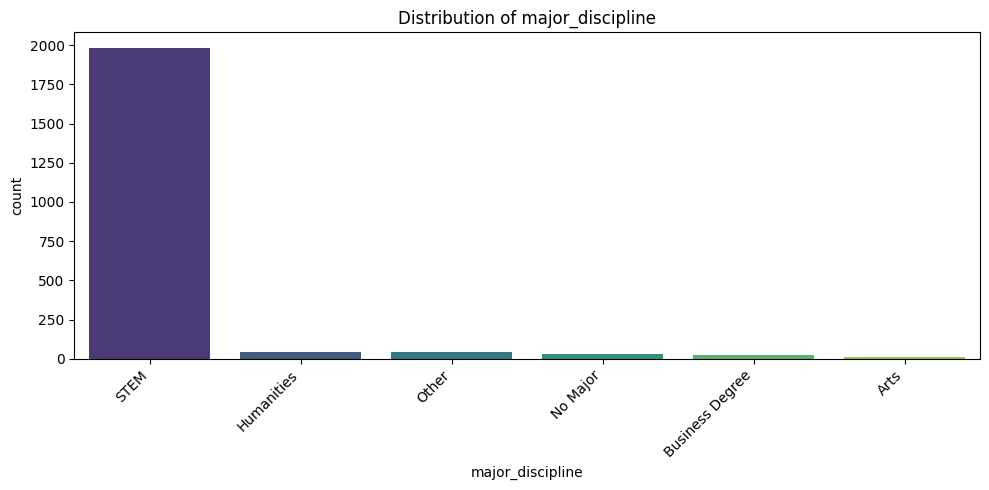

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


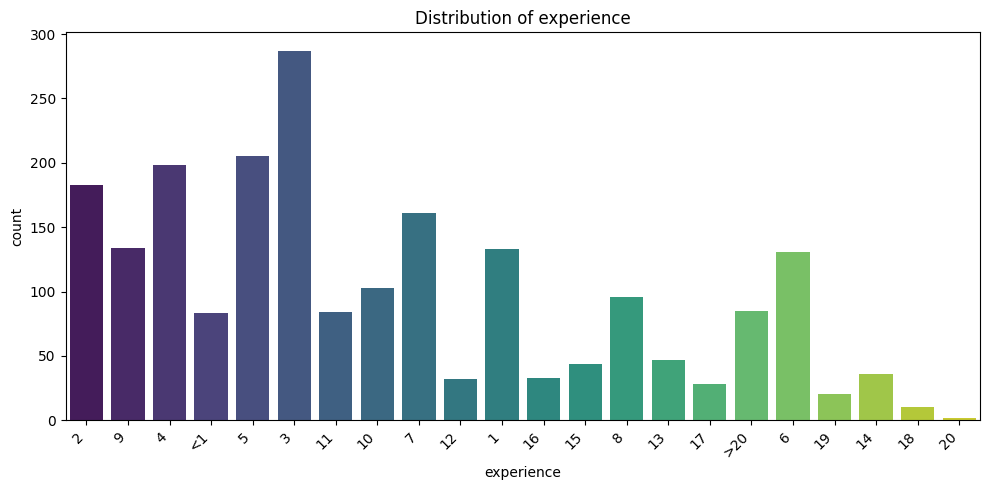

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


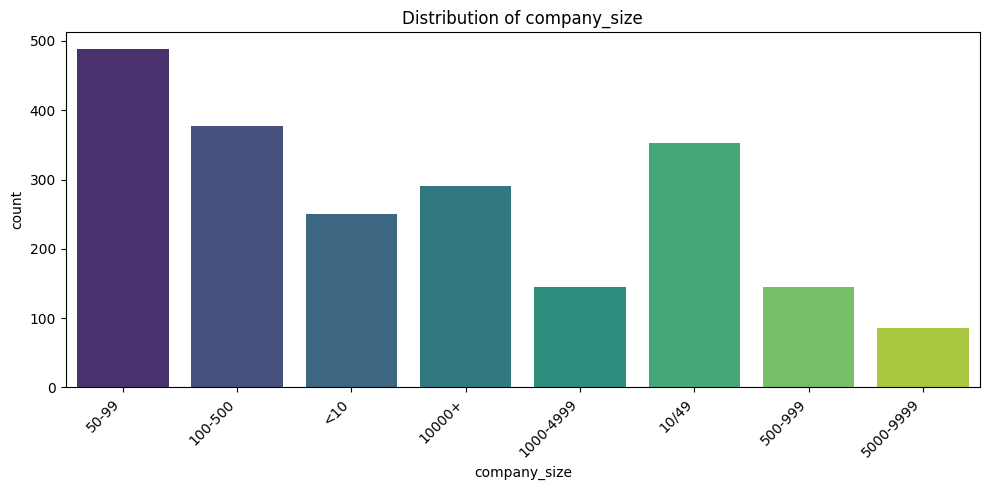

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


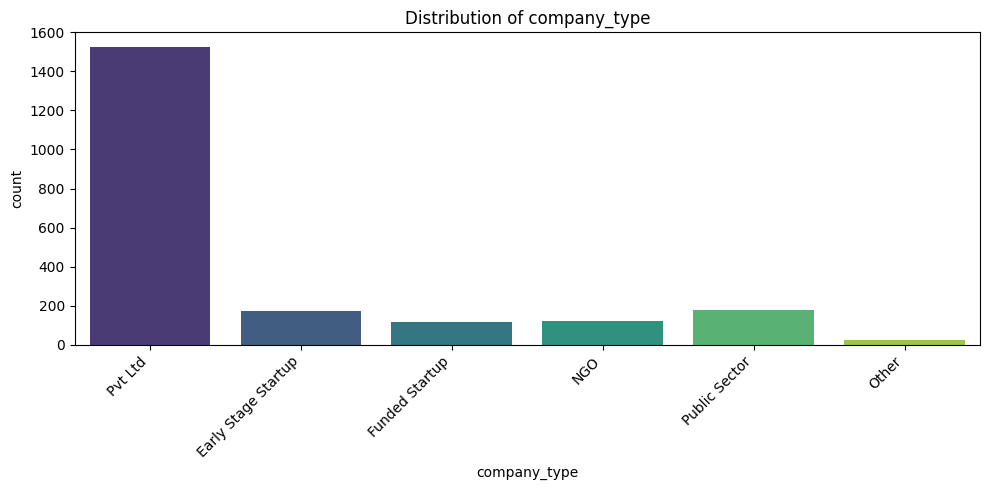

/tmp/ipython-input-2399951418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


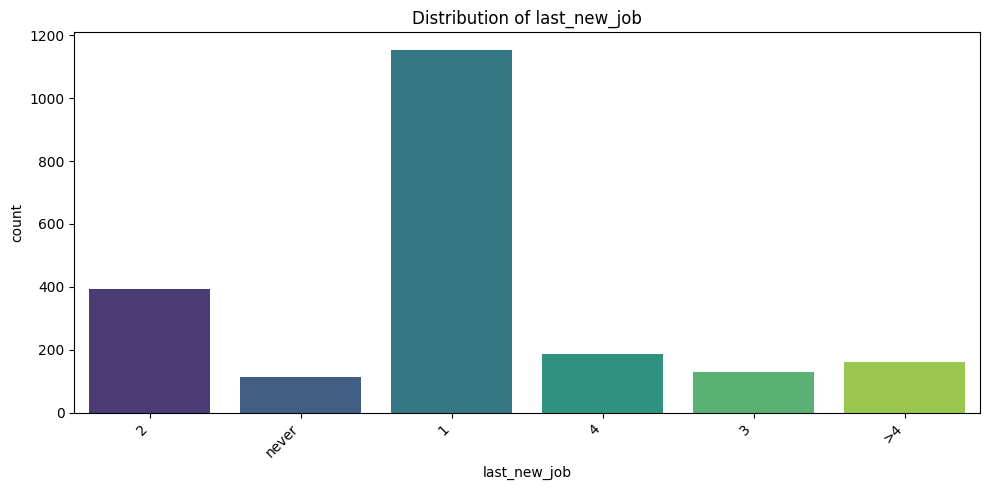

In [ ]:
# Histogram of categorical features
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Comments on histogram distribution of categorical features

1. **gender**: Male candidates significantly outnumber female candidates. This imbalance likely reflects gender representation within the industry or job role rather than company bias, as the dataset tracks training participants rather than hiring choices. The skew could indicate that more men participate in this kind of training program or that the broader talent pool in this sector is male-dominated. This imbalance may influence model behavior, as gender could correlate with other features such as experience or training hours.

2. **education_level**: Most candidates hold a bachelor’s degree, with smaller proportions holding master’s or PhD degrees. This indicates that the training program primarily attracts fresh graduates or early-career professionals. Higher-education holders (master’s or PhD) represent a small fraction of participants and might have different career goals or job-change motivations. Thus, education_level could indirectly influence job-change prediction, as candidates with advanced degrees may either be more confident in switching jobs or already be in more stable positions.

3. **major_discipline**: The majority of candidates come from STEM disciplines, which aligns with the nature of roles typically requiring technical expertise. This concentration suggests that STEM-trained individuals are the primary audience for the training program, possibly because the company operates in a tech-related or data-driven domain. Non-STEM candidates (e.g., from Humanities or Business) form a minor group and may have different motivations for attending training — possibly career switching or diversification, which could influence their job-change likelihood differently.

4. **company_type**: Most candidates are or were associated with Private Limited (Pvt Ltd) companies. This suggests that many participants already have industry exposure, which could shape their job-change tendencies. For instance, those with experience in the private sector might seek better pay or stability, while those from other company types (e.g., public sector, startups) might have different mobility patterns. Although company_type may not directly drive predictions, it contributes contextual information about professional background and work environment.

5. **last_new_job**: This feature represents how long ago a candidate last changed jobs. Most candidates changed jobs one year ago, indicating a relatively dynamic group — possibly those still exploring career fit or seeking advancement. Smaller groups with longer intervals (2–4+ years) might represent more stable employees or those satisfied with their current roles. Hence, last_new_job can serve as a useful behavioral indicator in predicting job-change intent.

6. **relevant_experience**: Over 60% of candidates have relevant prior experience, suggesting that a majority of participants already possess domain knowledge or prior exposure to similar roles. This could mean they are strategically attending training to upskill or reposition themselves for better opportunities, potentially making them more prone to job change. Conversely, inexperienced participants might be more focused on skill acquisition before seeking new employment.

7. **enrolled_university, experience, company_size**: These features show additional background information but may have weaker direct influence compared to experience-related variables. Among them, experience remains meaningful — candidates with more years of experience might show different job-change patterns, depending on satisfaction, salary expectations, or career stage. However, relevant_experience still offers a more precise signal about a participant’s readiness or intention to move to a new role.
  

#### 1.1.2 Data Preprocessing for Training

In [ ]:
# Transform 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size' and 'company_type' into one-hot encoding variables
data = pd.get_dummies(data, columns=["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_size", "company_type"])
data.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Female,gender_Male,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.704,2,2,71,1.0,False,True,True,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0.594,9,never,217,1.0,True,False,True,False,True,...,True,False,False,False,True,False,False,False,False,False
2,0.596,2,2,12,1.0,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.614,4,1,20,1.0,False,True,True,False,True,...,True,False,False,False,False,False,False,False,False,True
4,0.534,<1,1,52,1.0,False,True,False,True,True,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
# Observe that there are some "string values" among the feature "experience" and "last_new_job" such as
# "never", "<1", ">20", ">4". Hence we will define some mapping functions below to convert those string values to numeric
import pandas as pd

# Process string representation to numeric value of category "experience"
# The principle is to assign the next integer bounded above/below the given string representation
def clean_experience(s):
    s = s.astype(str).str.strip()
    s = s.replace({r'^<\s*1$': '0', r'^>\s*20$': '21'}, regex=True)
    return pd.to_numeric(s, errors='coerce')

# Process string representation to numeric value of category "last_new_job"
def clean_last_new_job(s):
    s = s.astype(str).str.strip()
    s = s.replace({r'^>\s*4$': '5'}, regex=True)
    s = s.replace({'never': '0'})
    # I find it a little bit unclear at this mapping, since some candidates "nevers" changed their jobs?
    # So the interval of previous to current job are quite undefined. Since these candidates shows a great stability in the job market, I will
    # assign it to be 6 years to deal with this data set.
    return pd.to_numeric(s, errors='coerce')

In [ ]:
# Can we clean the last_new_job and experience of data using the functions above
data['experience'] = clean_experience(data['experience'])
data['last_new_job'] = clean_last_new_job(data['last_new_job'])

In [ ]:
# Drop the 5-th column since it is the data label
X = data.drop(columns=["target"])
# Assign data label to variable 'y'
y = data.target

In [ ]:
# Print X - data features and y - data label to double check if we correctly processed
print(X)
print(y)

      city_development_index  experience  last_new_job  training_hours  \
0                      0.704           2             2              71   
1                      0.594           9             0             217   
2                      0.596           2             2              12   
3                      0.614           4             1              20   
4                      0.534           0             1              52   
...                      ...         ...           ...             ...   
2130                   0.698           3             1              14   
2131                   0.920           3             1              94   
2132                   0.926          19             4              27   
2133                   0.895          21             5              18   
2134                   0.624           1             1              52   

      gender_Female  gender_Male  relevent_experience_Has relevent experience  \
0             False         Tr

### 1.2 Imbalance Dataset Handling

Comments:
- From the above features' histogram insights, we can observe that, there are some criteria are unbalancedly distributed (**'gender'**, **'major_discipline'**, **'compamny_type'**, and so on). Hence, possibly that our data set is imbalanced.
- To proceed the implementation, we aim to apply the SMOTE (Synthetic Minority Over-sampling Technique) for this dataset.

In [ ]:
# Load libraries to proceed the train/test split process
import numpy as np
from sklearn.model_selection import train_test_split

# Train/test split with 20% used for testing, 80% used for training
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state = 1, test_size=0.2)

In [ ]:
# Checking data's sample before oversampling

# Check the shape of training feature matrix
print("Before oversampling: " + str(X_train.shape))

# Find unique labels and count the number of its appeareance
print(np.unique(y_train, return_counts=True))
# Class 0 appears 836 times, while Class 1 appears 872 times. The class label are slightly imbalanced but not so extreme
# but still, let's apply the SMOTE for some improvement

Before oversampling: (1708, 33)
(array([0., 1.]), array([836, 872]))


In [ ]:
# Load the SMOTE library
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=5)

In [ ]:
# Oversample label '0'
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))

Before oversampling: (1708, 33)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 33)
(array([0., 1.]), array([872, 872]))


### 1.3 Hyperparameter Tuning and Model Training

#### 1.3.2 Random Forest

In [373]:
# Build a RandomForest
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],          # Criterion to evaluate the purity
          "max_depth": [7, 9, 11],            # Maximum depth of the tree
          "min_samples_split": [8, 10, 12, 14]}       # Stop splitting condition

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=30, n_jobs=-1), param_grid=params, cv= 8) # Number of trees in the forest is 10
# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=8, estimator=RandomForestClassifier(n_estimators=30, n_jobs=-1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 10, 12, 14]})

In [374]:
# Best set of hypeparameters of the Random Forest model
grid_search_rf.best_params_
# I have tried many arrays for 'max_depth' = [5, 7, 9, 11], most of the accuracy resembles to each other
# with the max_depth's best_params at 11. Hence, I move to tune 'min_samples_split', most of the accuracy resembles at 'min_samples_split' at 10
# I believe the model is fine for accuracy at 0.86, if extend the arrays, the accuracy might high but also possibly be overfitted.
# Conclusion, the best_params_ for this RandomForestClassifier is 'max_depth' = 11 and 'min_sample_split' = 10

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 10}

In [378]:
# Build a Random Forest model pipeline
model_rf = RandomForestClassifier(n_estimators=15, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [379]:
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=11, min_samples_split=10, n_estimators=15,
                       random_state=1)

In [380]:
# Calculate some evaluation metrics
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

# Note: theoretically saying, there is no guarantee that the Random Forest is alsways better than the Decision Tree, i.e., the model ensembling is not always better than a single model in general.

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       199
         1.0       0.88      0.86      0.87       228

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



In [381]:
import pandas as pd

# Get feature importances
importances = model_rf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                                        Feature  Importance
0                        city_development_index    0.424916
1                                    experience    0.141724
3                                training_hours    0.075524
2                                  last_new_job    0.053406
9          enrolled_university_Part time course    0.030206
8          enrolled_university_Full time course    0.020978
20                         company_size_100-500    0.020760
6   relevent_experience_Has relevent experience    0.016776
21                       company_size_1000-4999    0.016171
31                   company_type_Public Sector    0.015273


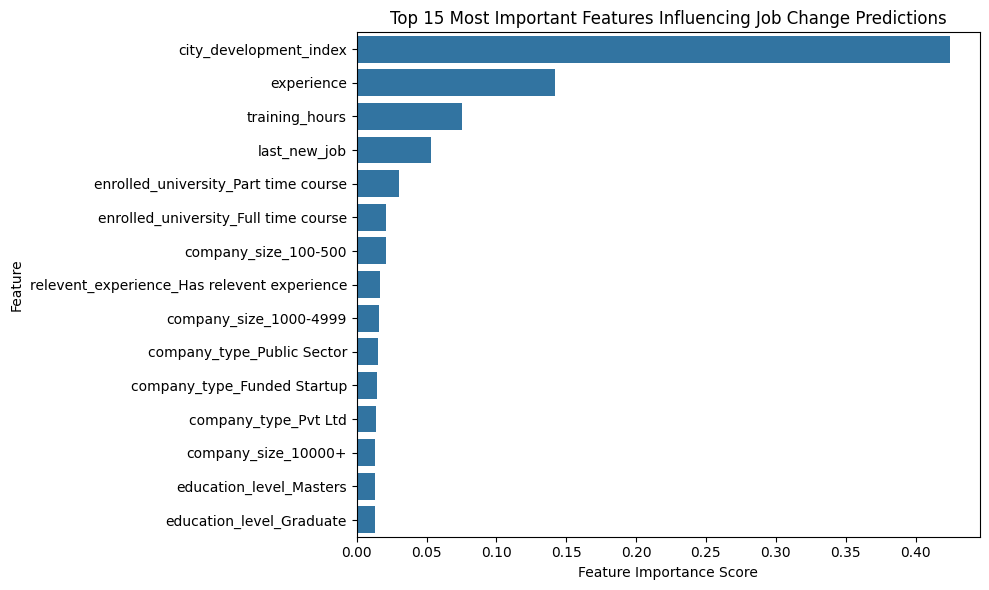

In [382]:
# Visualize the feature importance scores.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features Influencing Job Change Predictions')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### 1.3.1 Decision Tree

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],
          "max_depth": [5, 6],
          "min_samples_split": [3, 5]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=8)

In [ ]:
# Feed the grid_search_cv with the oversampling train set
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6],
                         'min_samples_split': [3, 5]})

In [ ]:
# Best set of hypeparameters of the Decision Tree model
grid_search.best_params_
# I tried the technique that first gradually testing for small interval. E.g. max_depth = [2, 3] first, then observe the accuracy
# record and note the best params, then test it with the next interval, e.g. max_depth = [3, 4] and so on, observe the trends if
# at some best_params of max_depth that the accuracy can't go any higher, then we can stop there and tune min_sample_split
# From my first pair of condition, most accuracy recorded are 0.81, 0.82 only when its max_depth = 6, it returns 0.82.
# For any intention to test anymore, I believe the accuracy won't increase anymore, instead, increasing the max_depth potentially lead to model's overfitted.
# Therefore, the best_params are 'max_depth' = 6 and 'min_samples_split' = 3.

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 3}

In [ ]:
# Build a decision tree model pipleine from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)

In [ ]:
# Calculate some evaluation metrics
from sklearn.metrics import classification_report

# Make prediction on the test set  after training on the oversampled training set.
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       199
         1.0       0.83      0.83      0.83       228

    accuracy                           0.82       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.82      0.82      0.82       427



In [ ]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

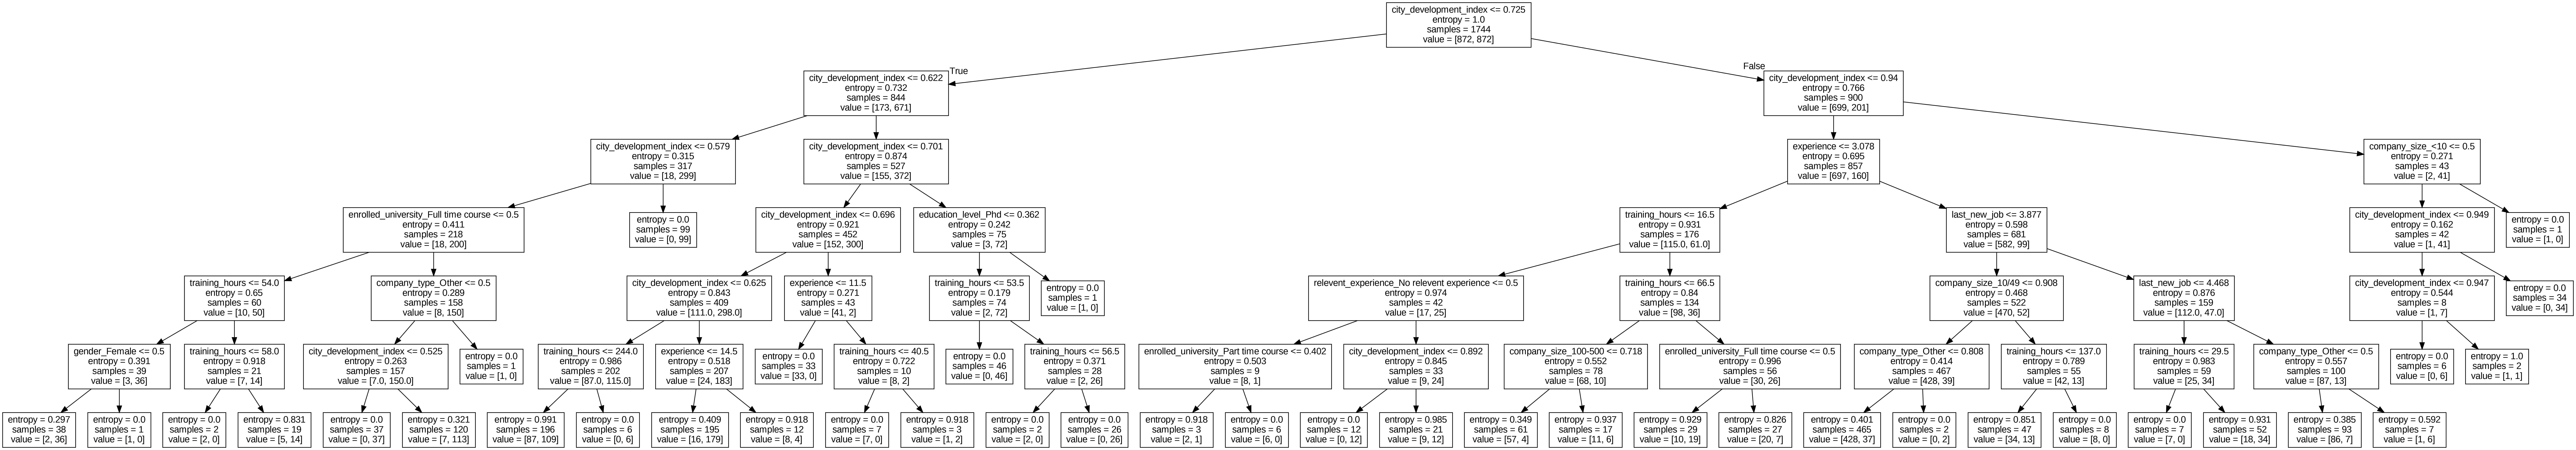

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

**Comments:**


- Attendees from moderately developed cities (city development index around or below 0.7) with moderate experience — roughly under 12 years — generally prefer stability. Their professional grounding and the surrounding job environment seem solid enough to encourage staying put.

- In contrast, candidates from less developed cities (index ≤ 0.58), especially those who did not complete full-time university degrees and work in nontraditional or smaller companies, are more inclined to seek new opportunities. Limited local options or weaker institutional ties probably make job changes more appealing.

- Interestingly, even in high-development areas (index ≥ 0.94), some participants show restlessness. Those with low relevant experience and few training hours still lean toward leaving, suggesting that opportunity-rich environments don’t guarantee retention — skill level and career confidence still matter.

- A few high-education patterns also stand out: people with lower city indices and doctoral degrees (PhD) often exhibit higher change tendencies, perhaps reflecting frustration with limited high-skill roles in smaller markets.

- Meanwhile, the most loyal group appears to be those in high-development cities, with more than three years of experience, stable company sizes, and recent job changes older than three years. They show a strong signal of staying — a classic case of experienced professionals settling into long-term roles.

- Finally, gender and training factors reveal subtler signals: female attendees from lower-development cities with minimal training hours show slightly higher turnover tendencies, hinting that uneven access to training or growth pathways might play a role in job dissatisfaction.

## 2. Open discussion questions

### 2.1 Which features in the dataset do you think are most important for predicting job changes? Did the feature importance analysis confirm your expectations?

#### Recall previous insights from Basic Analysis & Visualization part

1. **Comments on histogram distribution of continuous features**: (city_development_index and training_hours):
  - The city_development_index likely represents the level of development of the city where each candidate currently lives or works, reflecting access to infrastructure, education, and economic opportunities. From the histogram, we can see that **a huge portion of candidates come from cities with a development index between 0.9 and 1.0**, meaning that **a large portion of the training participants are from highly developed urban areas**. This could imply that **`these candidates already have greater access to job opportunities and may therefore be more likely to explore job changes`**.
  - **A notable portion of candidates also come from moderately developed cities (around 0.6)**, suggesting some diversity in background. **`However, very few candidates are from less-developed regions (below 0.5)`**, indicating that **`the dataset is skewed toward more developed cities`**. This concentration may **introduce bias in the model**, as **`the relationship between city development and job change tendency could be underrepresented for candidates from less-developed areas`**.

  - For the training_hours feature, the distribution is right-skewed, with most candidates completing between 25 and 40 hours of training. As training hours increase beyond 100, the frequency steadily declines. This pattern suggests that most trainees spend a moderate amount of time in training, which may reflect either efficient learning or limited need for extensive upskilling. Conversely, candidates with very high training hours may represent individuals who are actively reskilling or preparing for a career shift, potentially indicating a higher likelihood of job change. Thus, training_hours could serve as a proxy for career motivation or transition readiness, making it an important predictor for job change intent.

  - Overall, the dataset offers useful variation in training activity and city background but shows a bias toward candidates from moderately to highly developed cities. This bias means the model may overfit to urban patterns of job change behavior and might not generalize well to candidates from less-developed areas. In this context, city_development_index helps capture environmental job mobility factors, while training_hours reflects individual readiness or intent to seek new opportunities.

2. **Comments on histogram distribution of categorical features**:

- gender: Male candidates significantly outnumber female candidates. This imbalance likely reflects gender representation within the industry or job role rather than company bias, as the dataset tracks training participants rather than hiring choices. The skew could indicate that more men participate in this kind of training program or that the broader talent pool in this sector is male-dominated. This imbalance may influence model behavior, as gender could correlate with other features such as experience or training hours.

- education_level: Most candidates hold a bachelor’s degree, with smaller proportions holding master’s or PhD degrees. This indicates that the training program primarily attracts fresh graduates or early-career professionals. Higher-education holders (master’s or PhD) represent a small fraction of participants and might have different career goals or job-change motivations. Thus, education_level could indirectly influence job-change prediction, as candidates with advanced degrees may either be more confident in switching jobs or already be in more stable positions.

- major_discipline: The majority of candidates come from STEM disciplines, which aligns with the nature of roles typically requiring technical expertise. This concentration suggests that STEM-trained individuals are the primary audience for the training program, possibly because the company operates in a tech-related or data-driven domain. Non-STEM candidates (e.g., from Humanities or Business) form a minor group and may have different motivations for attending training — possibly career switching or diversification, which could influence their job-change likelihood differently.

- company_type: Most candidates are or were associated with Private Limited (Pvt Ltd) companies. This suggests that many participants already have industry exposure, which could shape their job-change tendencies. For instance, those with experience in the private sector might seek better pay or stability, while those from other company types (e.g., public sector, startups) might have different mobility patterns. Although company_type may not directly drive predictions, it contributes contextual information about professional background and work environment.

- last_new_job: This feature represents how long ago a candidate last changed jobs. Most candidates changed jobs one year ago, indicating a relatively dynamic group — possibly those still exploring career fit or seeking advancement. Smaller groups with longer intervals (2–4+ years) might represent more stable employees or those satisfied with their current roles. Hence, last_new_job can serve as a useful behavioral indicator in predicting job-change intent.

- relevant_experience: Over 60% of candidates have relevant prior experience, suggesting that a majority of participants already possess domain knowledge or prior exposure to similar roles. This could mean they are strategically attending training to upskill or reposition themselves for better opportunities, potentially making them more prone to job change. Conversely, inexperienced participants might be more focused on skill acquisition before seeking new employment.

- enrolled_university, experience, company_size: These features show additional background information but may have weaker direct influence compared to experience-related variables. Among them, experience remains meaningful — candidates with more years of experience might show different job-change patterns, depending on satisfaction, salary expectations, or career stage. However, relevant_experience still offers a more precise signal about a participant’s readiness or intention to move to a new role.

#### Answer:
- Based on the earlier preprocessing analysis, I am convinced that "city_development_index" is an important factor in predicting job changes, but I didn't consider it **the most decisive one**. This is supported both by the feature-importance ranking and by intuition: people in more developed cities are exposed to greater growth and opportunities, which can increase their motivation to change jobs or pursue career progression.

- The next important factor is "training_hours", which reflects the extent of a person’s exposure to job-related tasks in a work environment. It is therefore reasonable to view it as an influential driver of job-change decisions.

- However, according to the Random Forest feature-importance ranking, **I overlooked another factor**: "experience", which is **the second most influential predictor**. This makes sense because "experience" **captures not only length of employment but also a candidate’s skill in the field**. Consequently, "experiences" likely **play a substantial role in predicting job changes**, **including whether candidates intend to continue working in the field or leave it**.

### 2.2 How did the performance of the Random Forest model compare to the Decision Tree model? Was this result expected?

Recall a metrics overhere and make comparisons

In [385]:
# Metrics of Decision Tree Model
pred_y = model_dt.predict(X_test)
print("Decision Tree Evaluation:\n", classification_report(y_test, pred_y))

# Metrics of Random Forest Model
pred_y = model_rf.predict(X_test)
print("Random Forest Evaluation:\n", classification_report(y_test, pred_y))

Decision Tree Evaluation:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       199
         1.0       0.83      0.83      0.83       228

    accuracy                           0.82       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.82      0.82      0.82       427

Random Forest Evaluation:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       199
         1.0       0.88      0.86      0.87       228

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



Answer:
- The Random Forest model outperformed the Decision Tree model across all key metrics. The Decision Tree achieved an overall accuracy of 0.82, with precision, recall, and F1-scores around 0.81–0.83 for both classes. In contrast, the Random Forest reached an accuracy of 0.86, with stronger precision and recall values of 0.84–0.88 and F1-scores around 0.85–0.87.

- This improvement was expected because Random Forests reduce the variance and overfitting tendency of single Decision Trees. By averaging results from multiple randomized trees, the ensemble model produces more stable and generalized predictions.

- In short, while the Decision Tree provided interpretability and clear rules, the Random Forest offered better predictive performance and robustness, confirming the trade-off between explainability and accuracy that’s typical when moving from a single tree to an ensemble model.

### 2.3 When visualizing the Decision Tree, were the splits and decisions intuitive? Did you notice any surprising decision rules?


#### **Recall Comments of Section 1.3 - Decision Tree**



- Attendees from moderately developed cities (city development index around or below 0.7) with moderate experience — roughly under 12 years — generally prefer stability. Their professional grounding and the surrounding job environment seem solid enough to encourage staying put.

- In contrast, candidates from less developed cities (index ≤ 0.58), especially those who did not complete full-time university degrees and work in nontraditional or smaller companies, are more inclined to seek new opportunities. Limited local options or weaker institutional ties probably make job changes more appealing.

- Interestingly, even in high-development areas (index ≥ 0.94), some participants show restlessness. Those with low relevant experience and few training hours still lean toward leaving, suggesting that opportunity-rich environments don’t guarantee retention — skill level and career confidence still matter.

- A few high-education patterns also stand out: people with lower city indices and doctoral degrees (PhD) often exhibit higher change tendencies, perhaps reflecting frustration with limited high-skill roles in smaller markets.

- Meanwhile, the most loyal group appears to be those in high-development cities, with more than three years of experience, stable company sizes, and recent job changes older than three years. They show a strong signal of staying — a classic case of experienced professionals settling into long-term roles.

- Finally, gender and training factors reveal subtler signals: female attendees from lower-development cities with minimal training hours show slightly higher turnover tendencies, hinting that uneven access to training or growth pathways might play a role in job dissatisfaction.

#### Answer:
- The splits and decisions in the Decision Tree were **generally intuitive** and **aligned with realistic job-change behavior** for some reasons:
  1. The "most influential feature" was the "city_development_index", which made sense since **economic and job-market maturity directly affect mobility**. *Attendees from moderately developed cities with moderate experience tended to stay*, while *those from less developed areas, especially without full-time university degrees*, showed *higher tendencies to change jobs*.

  2. Some surprising but insightful patterns emerged — for example, *even in high-development regions*, **candidates with low relevant experience** and **limited training hours** still **leaned toward job changes**, suggesting that **opportunity-rich environments don’t automatically ensure retention**. Similarly, **highly educated individuals (like PhD holders)** in smaller markets showed **higher turnover**, possibly **due to limited specialized roles**.

- Overall, the tree’s rules were interpretable and supported by logical socioeconomic trends: development level, education, experience, and training all shaped career stability in believable ways.

### 2.4 How could a company use a predictive model like this to improve its hiring and retention strategy? What are the potential benefits and risks?

Answer:

- A company could use this predictive model to identify employees or candidates who are more likely to change jobs and proactively address retention risks. For example, HR teams could focus engagement programs or training opportunities on employees from regions or backgrounds that show higher turnover tendencies. During hiring, the model could also help prioritize candidates more likely to stay long term, improving workforce stability and reducing recruitment costs.

- The benefits include more efficient resource allocation, improved retention strategies, and data-driven hiring decisions. It can help companies tailor development programs, compensation plans, and career paths to employees’ risk profiles, strengthening job satisfaction and loyalty.

- However, there are risks. Overreliance on such models can lead to bias and unfair treatment, especially if the training data reflects societal inequalities (e.g., city development level or gender factors). Using predictive outcomes for hiring decisions could unintentionally discriminate against certain groups or discourage diversity. There’s also a risk of eroding employee trust if people feel they are being “profiled” by algorithms.

- In short, predictive models like this are powerful tools for workforce planning — but they should be used ethically, transparently, and alongside human judgment, not in place of it.

### 2.5 What part of this assignment did you find most difficult or insightful? If you had more time, what additional improvements would you make?

- The least insightful part I’ve encountered so far was defining the stopping criteria for the models. It was challenging because even when parameter changes led to higher accuracy, the model sometimes became overfitted, which made it hard to decide where to stop tuning. If I had more time on this, maybe I will try to do brute-force searching, even though it takes time, but we can observe the overall trends of the models, even for the Random Forest, when we have to pick the reasonable number of trees (n_estimator).

- I noticed earlier that when the accuracy began to stabilize or repeat across parameter adjustments, it was a good point to stop increasing max_depth or min_samples_split, since pushing further would likely lead to overfitting rather than real improvement.

- Overall, I’m satisfied with the performance of both models. The Decision Tree, in particular, produced interpretable and realistic patterns that reflect meaningful trends in the labor market.

- The most interesting part so far has been exploring the feature importance scores produced by the Random Forest model. They offer clear and meaningful insights—not only showing which features have the greatest impact, but also ranking them quantitatively. This makes the approach stand out compared to other supervised learning methods I’ve studied, where the focus is often on performance metrics rather than interpretability. Being able to visualize and understand which factors drive the predictions makes the analysis far more engaging and insightful.

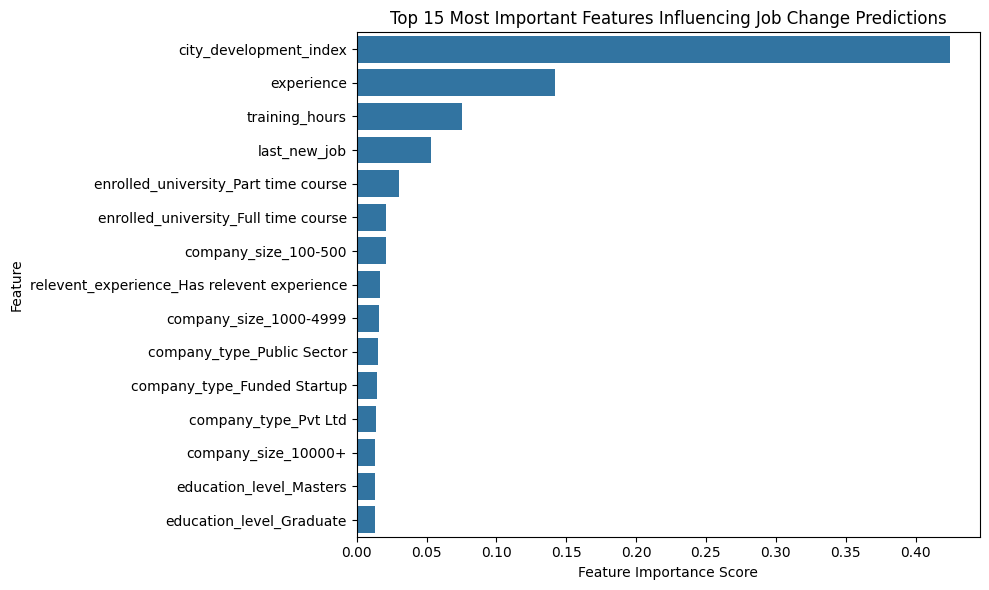

In [386]:
# Visualize the feature importance scores.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features Influencing Job Change Predictions')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()